#ADS-507-01 Group 3 Final Project
#Wild and Wonderful Sales: A Way to Hike Up your Profit
#Ben Earnest, Vannesa Salazar, Renetta Nelson

In [1]:
!pip install mysql-connector-python

In [115]:
#import libraries

import sqlalchemy
import os
import numpy as np
import pandas as pd
import pymysql as mysql
import matplotlib.pyplot as plt
import warnings
#import requests



warnings.filterwarnings('ignore')


You will need to add your own local server password (need to figure out a cleaner solution)

In [123]:
#update connection to use go sales database
connection = mysql.connect(host='localhost',
                         user='root',
                         password='Unicornbear#23',
                         database='gosales')

conn_gdp = mysql.connect(host='localhost',
                         user='root',
                         password='Unicornbear#23',
                         database='gdp_by_countries')

We can start queries here to start working the transform part (build the tables we want to use from the database)

In [117]:
num3 = pd.read_sql_query("""SELECT DISTINCT COUNT(Type), Country FROM go_retailers GROUP BY Country""", connection)
num3

,COUNT(Type),Country
0,43,France
1,26,Switzerland
2,38,Germany
3,34,Canada
4,104,United States
5,10,Mexico
6,49,Japan
7,17,Sweden
8,19,Netherlands
9,22,Italy


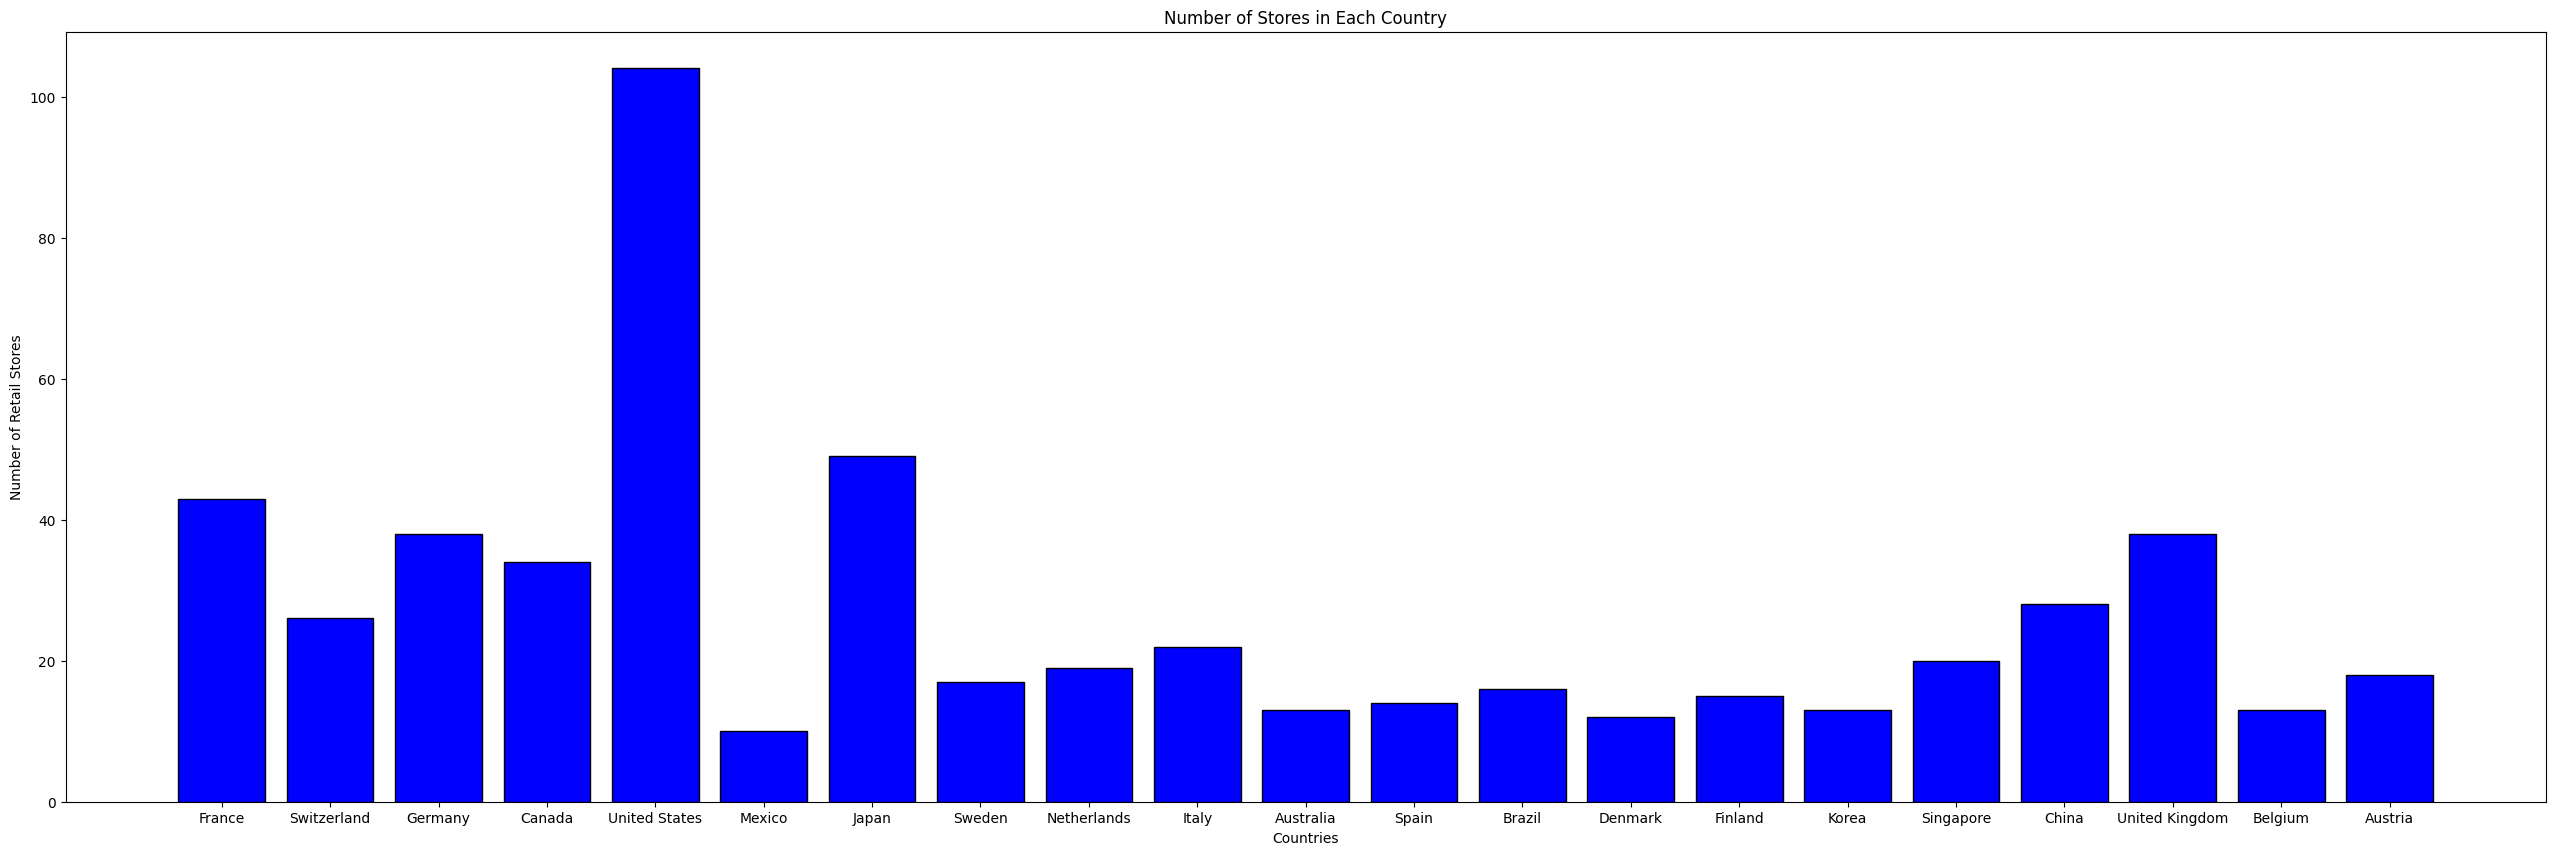

In [118]:
sql_cursor = connection.cursor()


sql_cursor.execute("""SELECT DISTINCT COUNT(Type), Country FROM go_retailers GROUP BY Country""")


cnttype = []
countryname = []

for x in sql_cursor:
    cnttype.append(x[0])
    countryname.append(x[1])




f = plt.figure()
f.set_figwidth(32)
f.set_figheight(10)


plt.bar(countryname, cnttype, color = 'b', edgecolor = 'black')
#plt.ylim(0, 250)
plt.xlabel("Countries")
plt.ylabel("Number of Retail Stores")
plt.title("Number of Stores in Each Country")
plt.show()


In [119]:
num4 = pd.read_sql_query("""SELECT COUNT(Type), Type FROM go_retailers GROUP BY Type""", connection)
num4

,COUNT(Type),Type
0,30,Equipment Rental Store
1,72,Golf Shop
2,45,Direct Marketing
3,46,Warehouse Store
4,164,Outdoors Shop
5,31,Eyewear Store
6,50,Department Store
7,124,Sports Store


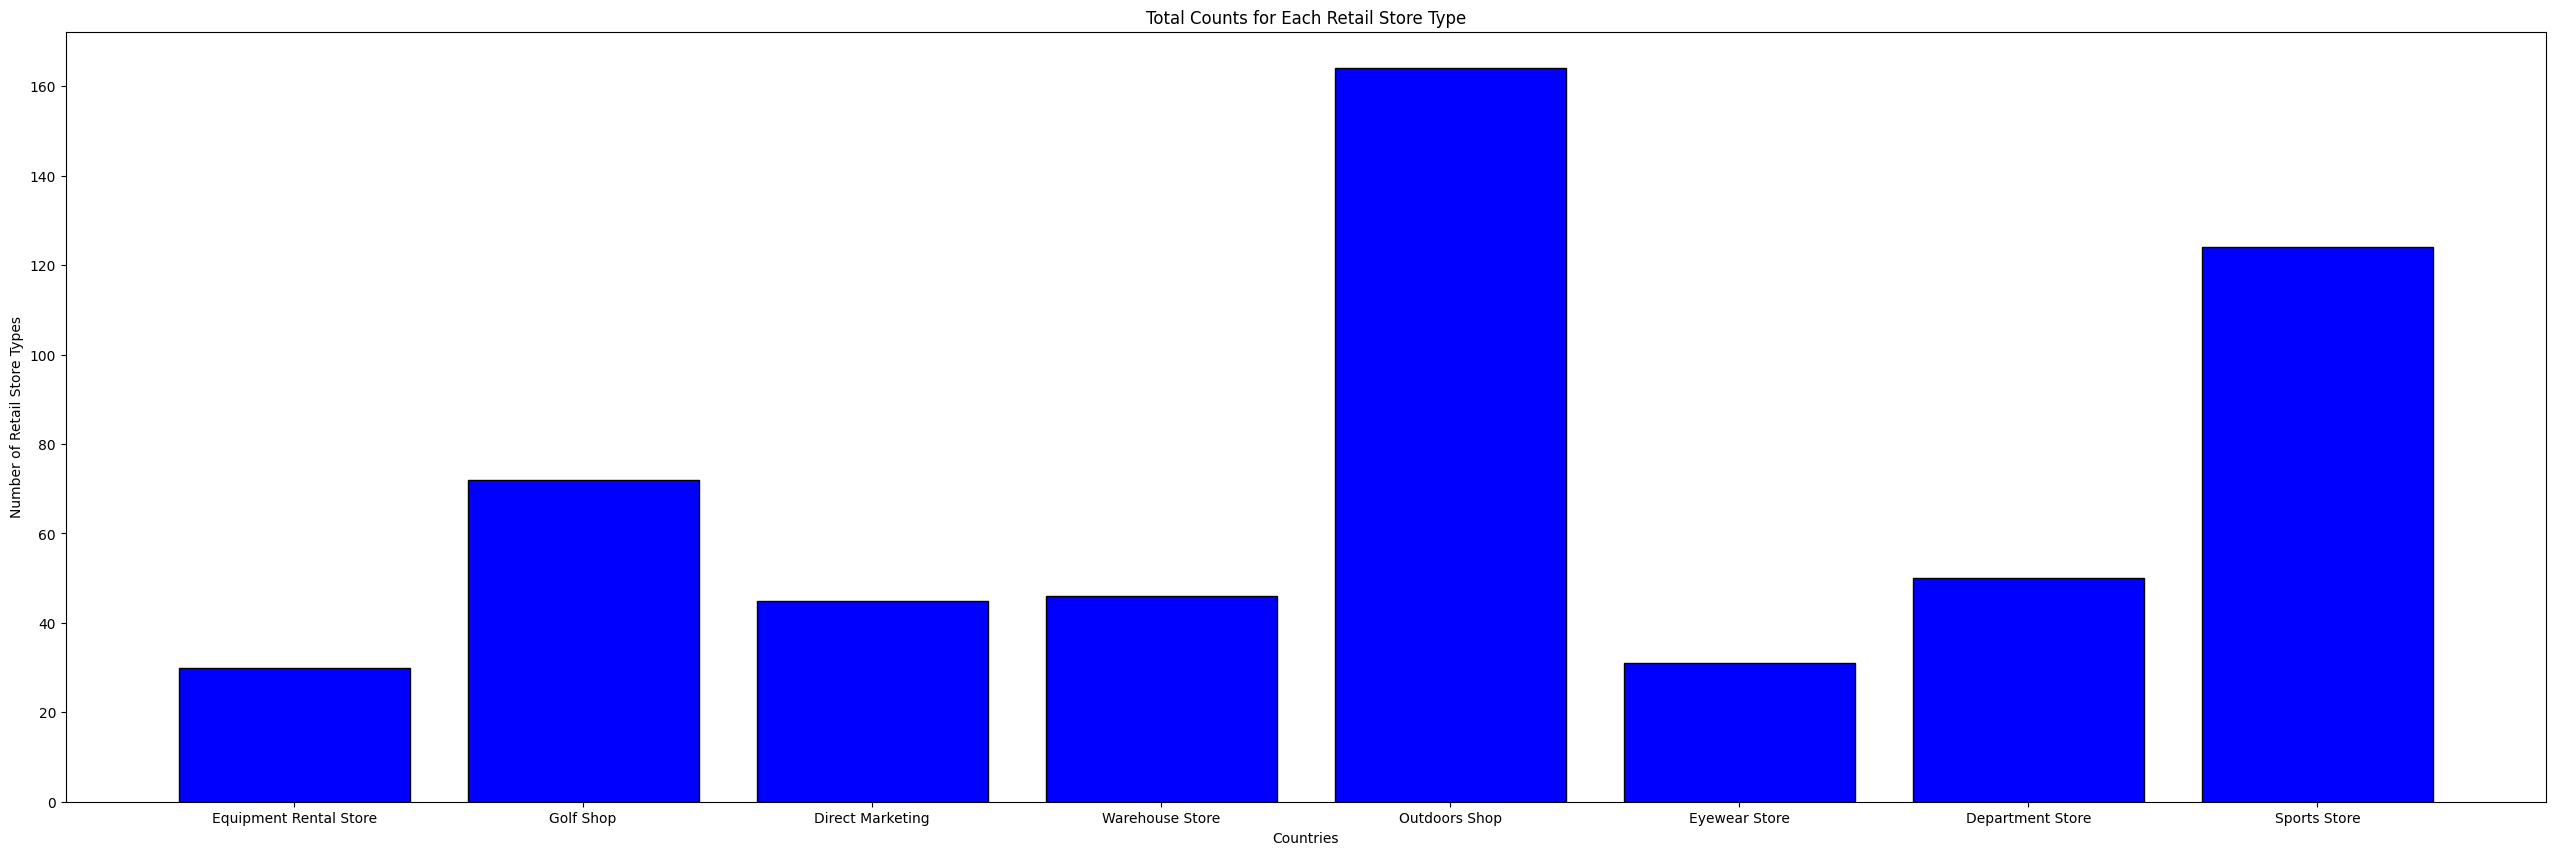

In [88]:
sql_cursor = connection.cursor()


sql_cursor.execute("""SELECT COUNT(Type), Type FROM go_retailers GROUP BY Type""")


cnttype = []
countryname = []

for x in sql_cursor:
    cnttype.append(x[0])
    countryname.append(x[1])




f = plt.figure()
f.set_figwidth(32)
f.set_figheight(10)


plt.bar(countryname, cnttype, color = 'b', edgecolor = 'black')
#plt.ylim(0, 250)
plt.xlabel("Countries")
plt.ylabel("Number of Retail Store Types")
plt.title("Total Counts for Each Retail Store Type")
plt.show()


In [79]:
num4 = pd.read_sql_query("""SELECT Type, Product_line, Quantity FROM go_products as gp 
                            INNER JOIN go_daily_sales as gds ON gp.Product_number = gds.Product_number 
                            INNER JOIN go_retailers as gr ON gds.retailer_code = gr.retailer_code
                            GROUP BY Product_line""", connection)
num4

,Type,Product_line,Quantity
0,Outdoors Shop,Outdoor Protection,2653
1,Outdoors Shop,Personal Accessories,18
2,Outdoors Shop,Mountaineering Equipment,472
3,Outdoors Shop,Camping Equipment,276
4,Department Store,Golf Equipment,34


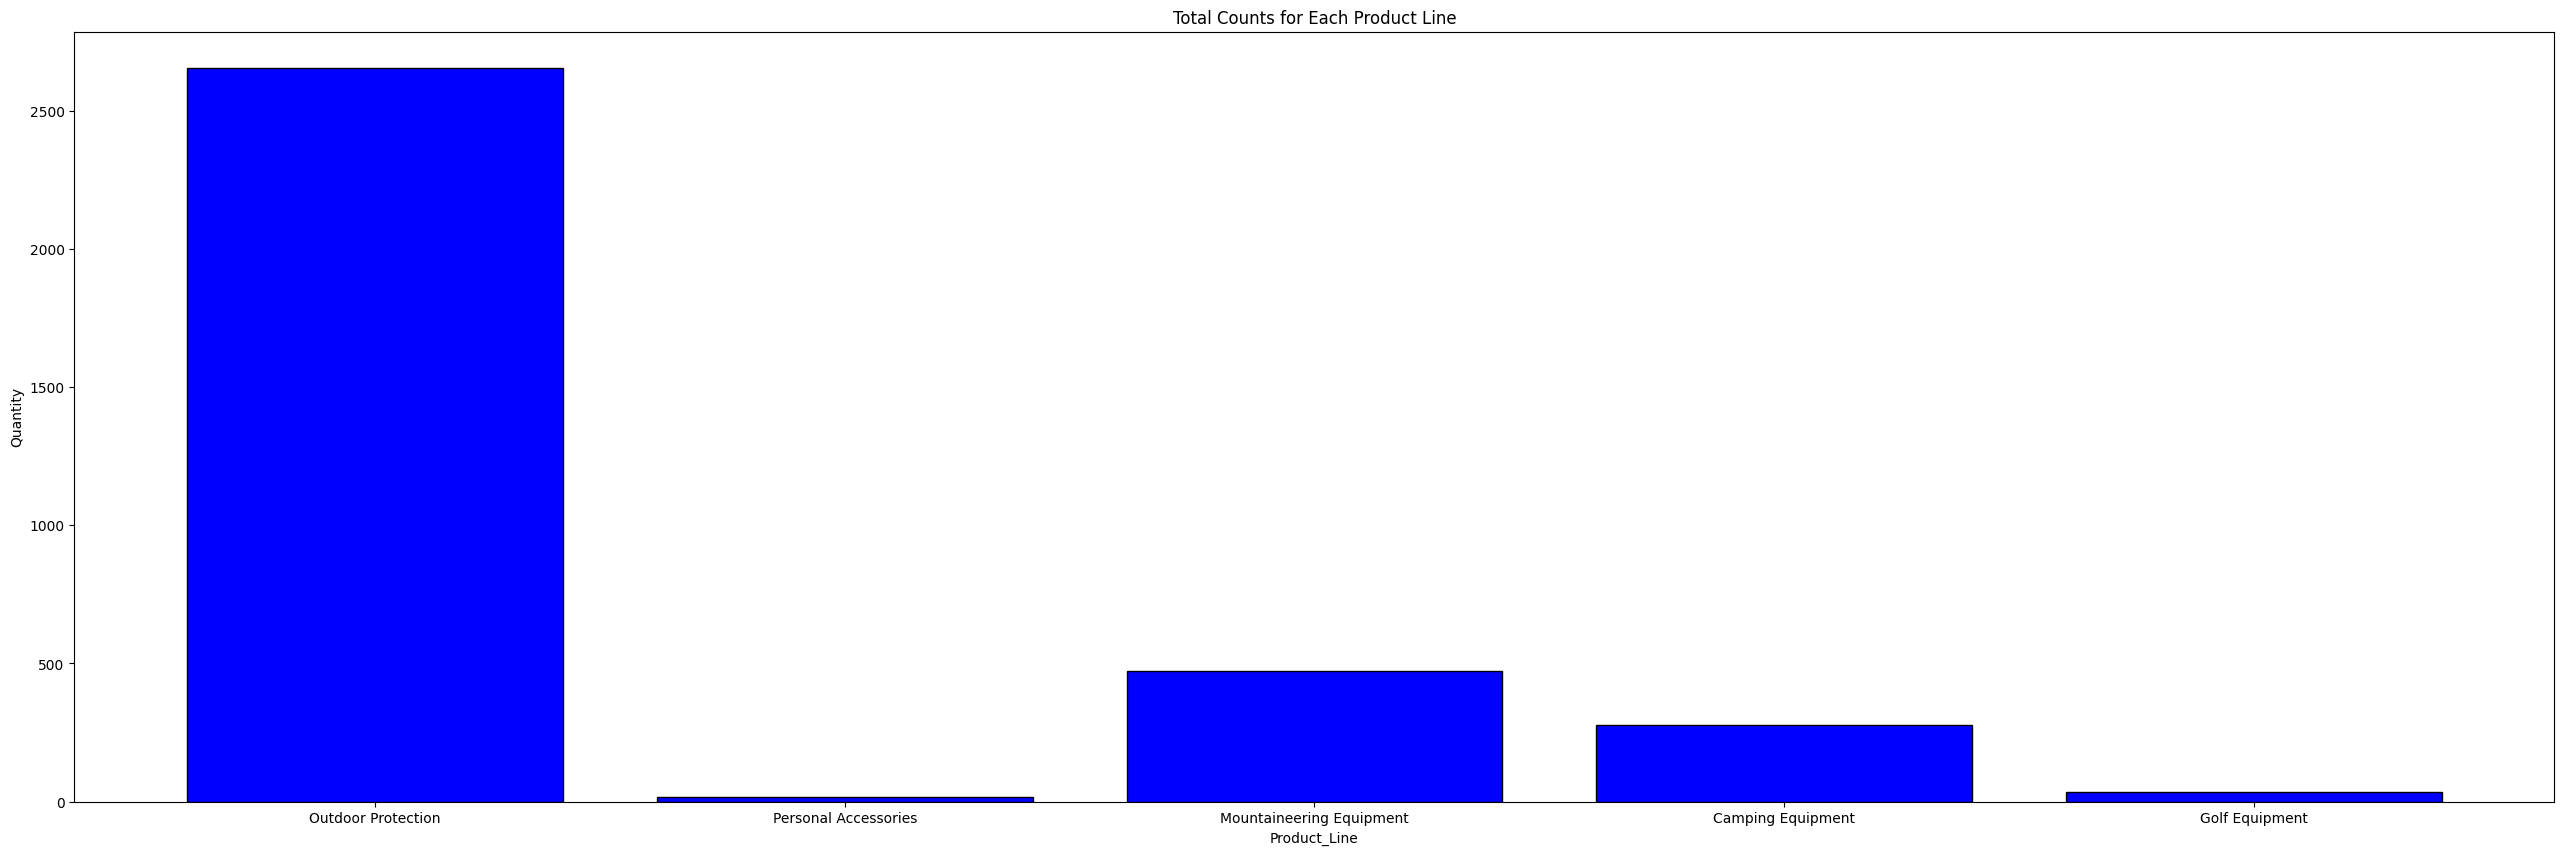

In [87]:
sql_cursor.execute("""SELECT Type, Product_line, Quantity FROM go_products as gp 
                            INNER JOIN go_daily_sales as gds ON gp.Product_number = gds.Product_number 
                            INNER JOIN go_retailers as gr ON gds.retailer_code = gr.retailer_code
                            GROUP BY Product_line""")


rety = []
repro = []
requant = []

for x in sql_cursor:
    rety.append(x[0])
    repro.append(x[1])
    requant.append(x[2])



f = plt.figure()
f.set_figwidth(32)
f.set_figheight(10)


plt.bar(repro, requant, color = 'b', edgecolor = 'black', label='Type')
#plt.bar(repro, requant, color = 'g', edgecolor = 'black', label='Product line')

#plt.bar(countryname, cnttype)
#plt.ylim(0, 250)
plt.xlabel("Product_Line")
plt.ylabel("Quantity")
plt.title("Total Counts for Each Product Line")
plt.show()

In [ ]:
#num3 = pd.read_sql_query("""SELECT DISTINCT Country, COUNT(Type), Type FROM go_retailers GROUP BY Country""", connection)
#num3

#num4 = pd.read_sql_query("""SELECT DISTINCT COUNT(Type), Type FROM go_retailers WHERE Country = 'United States' """, connection)
#num4

#num4 = pd.read_sql_query("""SELECT COUNT(Type), Type, Country FROM go_retailers WHERE Country = 'United States' GROUP BY Type""", connection)
#num4
